Price per Square Foot Statistics:
count    813.000000
mean     165.630157
std       55.533817
min        2.397602
25%      127.925747
50%      167.517007
75%      207.027540
max      552.398990
Name: price_per_sqft, dtype: float64


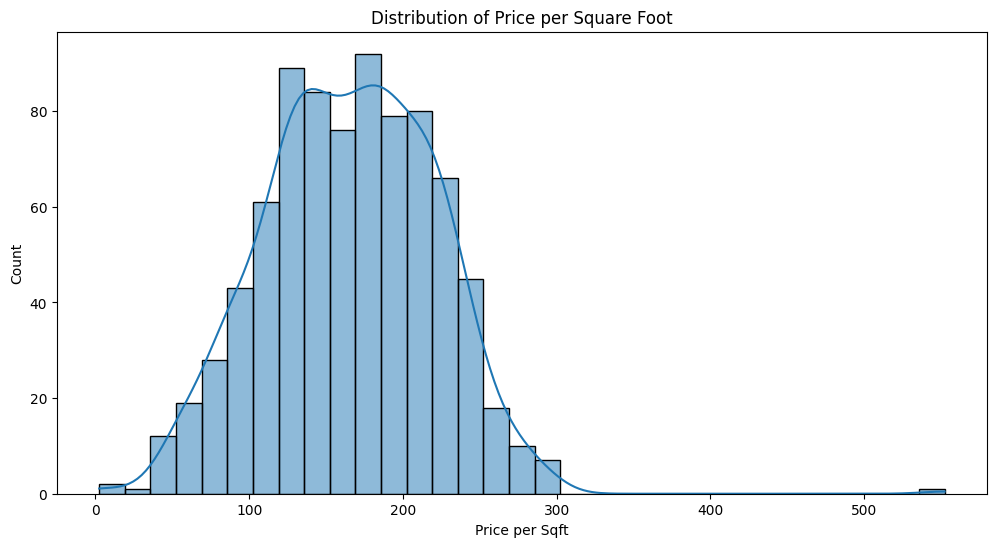


Price per Sqft by Neighborhood:
                                          mean      median  count
neighborhoods                                                    
Northwest Warren, Heritage Village  200.769991  208.011524      4
Northwest Warren                    198.357837  203.557508    124
Northeast Warren                    192.853119  191.912269    209
Southwest Warren                    155.367674  148.673786    216
Southeast Warren                    136.048494  133.333333    259


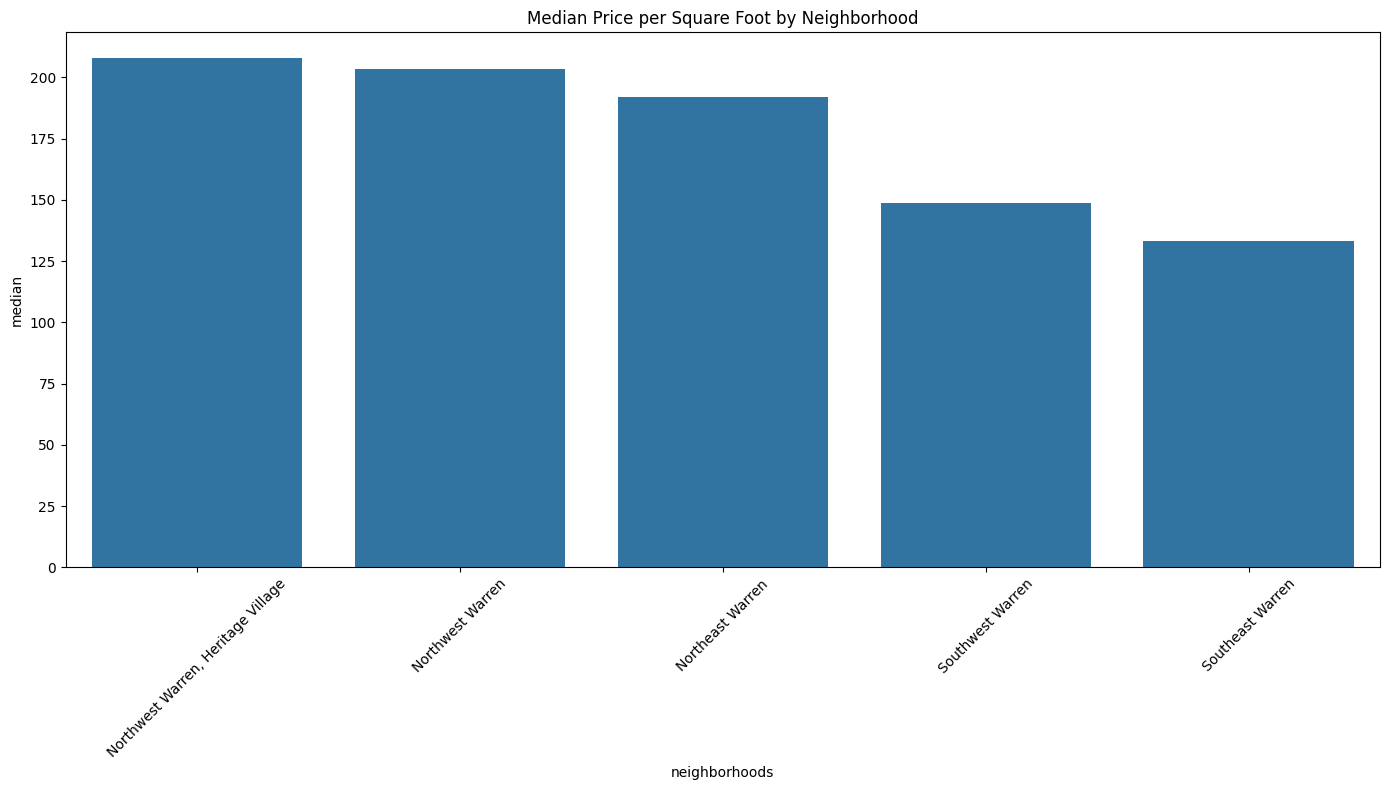

In [1]:
# Add this to your notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
sold_df = pd.read_csv("../data/sold_properties.csv")

# Calculate price per square foot
sold_df["price_per_sqft"] = sold_df["sold_price"] / sold_df["sqft"]

# Basic statistics for price per sqft
print("Price per Square Foot Statistics:")
print(sold_df["price_per_sqft"].describe())

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(sold_df["price_per_sqft"], kde=True)
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Sqft")
plt.ylabel("Count")
plt.show()

# By neighborhood
plt.figure(figsize=(14, 8))
neighborhood_prices = (
    sold_df.groupby("neighborhoods")["price_per_sqft"]
    .agg(["mean", "median", "count"])
    .sort_values("median", ascending=False)
)
print("\nPrice per Sqft by Neighborhood:")
print(neighborhood_prices)

sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices["median"])
plt.title("Median Price per Square Foot by Neighborhood")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

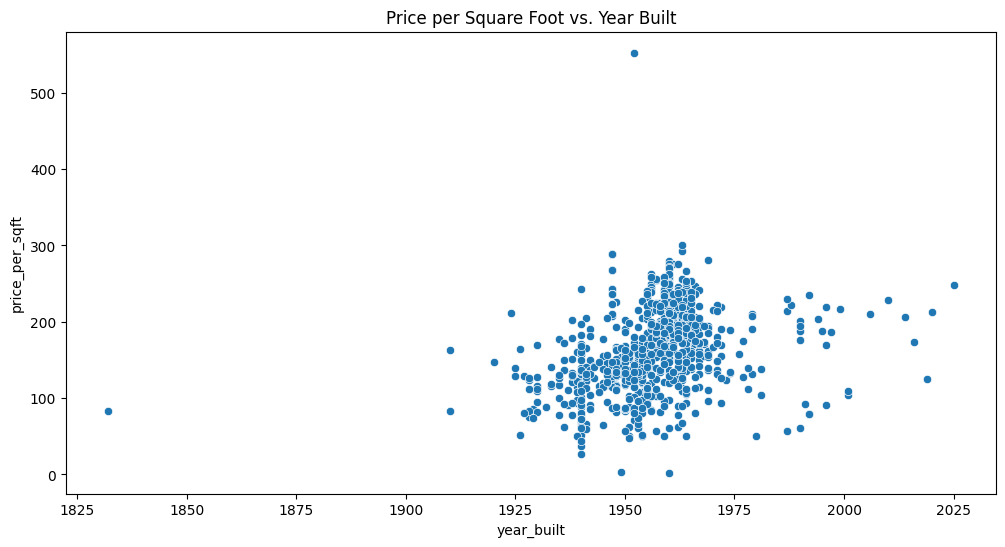

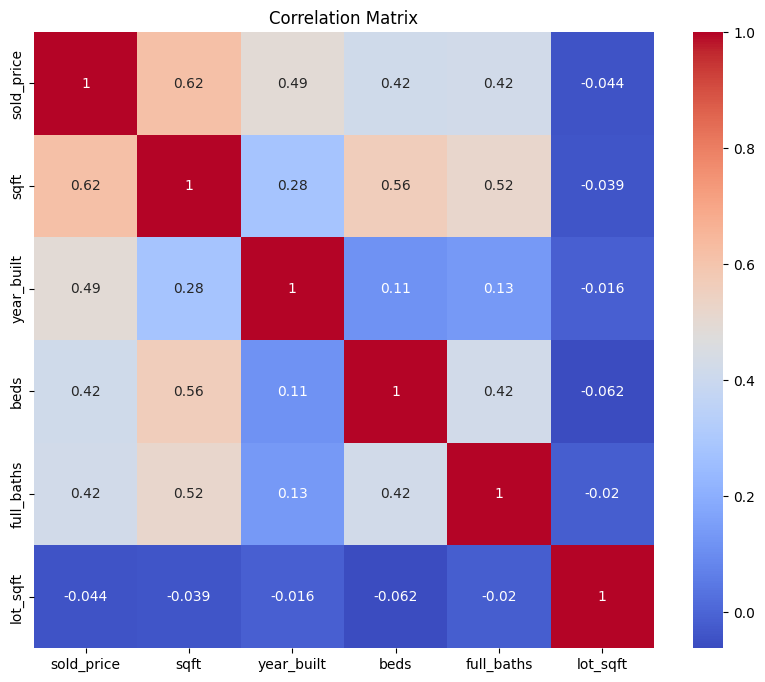

updated: 1637 mentions
needs_work: 679 mentions
cosmetic: 806 mentions
major: 410 mentions


In [2]:
# Analyze relationship between property characteristics and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x="year_built", y="price_per_sqft", data=sold_df)
plt.title("Price per Square Foot vs. Year Built")
plt.show()

# Calculate correlation matrix
numeric_cols = ["sold_price", "sqft", "year_built", "beds", "full_baths", "lot_sqft"]
correlation = sold_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Analyze text descriptions for renovation keywords
from collections import Counter

# Combine all text descriptions
all_text = " ".join(sold_df["text"].dropna().astype(str)).lower()

# Count renovation-related keywords
renovation_keywords = {
    "updated": ["updated", "renovated", "remodeled", "new"],
    "needs_work": ["needs", "repair", "fix", "update", "renovation"],
    "cosmetic": ["paint", "floor", "cosmetic", "minor"],
    "major": ["roof", "foundation", "structural", "major", "complete"],
}

for category, keywords in renovation_keywords.items():
    count = sum(all_text.count(keyword) for keyword in keywords)
    print(f"{category}: {count} mentions")

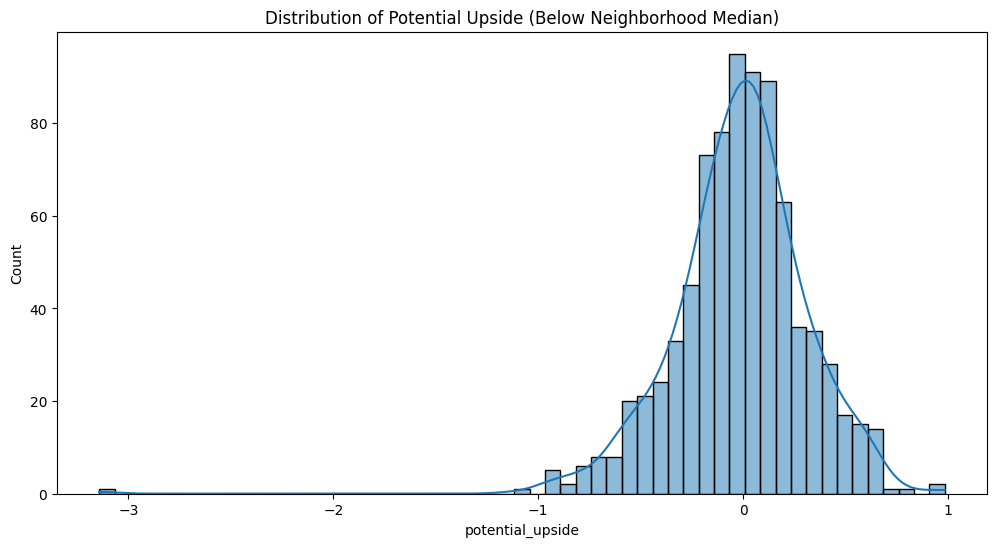

Potential Upside Statistics:
count    812.000000
mean      -0.015662
std        0.325704
min       -3.142992
25%       -0.184990
50%        0.000000
75%        0.168034
max        0.983873
Name: potential_upside, dtype: float64

Top 10 Properties with Highest Potential Upside:
                            formatted_address     neighborhoods  \
13      26304 Patricia Ave, Warren, MI, 48091  Southwest Warren   
519        11291 Paige Ave, Warren, MI, 48089  Southeast Warren   
85      23928 Dequindre Rd, Warren, MI, 48091  Southwest Warren   
143     21420 Sherwood Ave, Warren, MI, 48091  Southwest Warren   
428     13868 LA Chene Ave, Warren, MI, 48088  Northeast Warren   
455     20760 Atlantic Ave, Warren, MI, 48091  Southwest Warren   
776        20814 Helle Ave, Warren, MI, 48089  Southeast Warren   
279      25834 Loretta Ave, Warren, MI, 48091  Southwest Warren   
323      11555 Colpaert Dr, Warren, MI, 48093  Northeast Warren   
314  22248 Mac Arthur Blvd, Warren, MI, 48089  South

In [3]:
# Estimate potential profit margins (this is hypothetical but based on data patterns)
# We'll assume properties with lower price per sqft relative to neighborhood average have more potential

# Calculate neighborhood median price per sqft
neighborhood_median = (
    sold_df.groupby("neighborhoods")["price_per_sqft"].median().to_dict()
)
sold_df["neighborhood_median"] = sold_df["neighborhoods"].map(neighborhood_median)

# Calculate potential upside (how much below median the property is)
sold_df["potential_upside"] = (
    sold_df["neighborhood_median"] - sold_df["price_per_sqft"]
) / sold_df["neighborhood_median"]

# Analyze the distribution of potential upside
plt.figure(figsize=(12, 6))
sns.histplot(sold_df["potential_upside"], kde=True)
plt.title("Distribution of Potential Upside (Below Neighborhood Median)")
plt.show()

print("Potential Upside Statistics:")
print(sold_df["potential_upside"].describe())

# Properties with highest potential upside
high_potential = sold_df[sold_df["potential_upside"] > 0.2].sort_values(
    "potential_upside", ascending=False
)
print("\nTop 10 Properties with Highest Potential Upside:")
print(
    high_potential[
        [
            "formatted_address",
            "neighborhoods",
            "price_per_sqft",
            "neighborhood_median",
            "potential_upside",
        ]
    ].head(10)
)

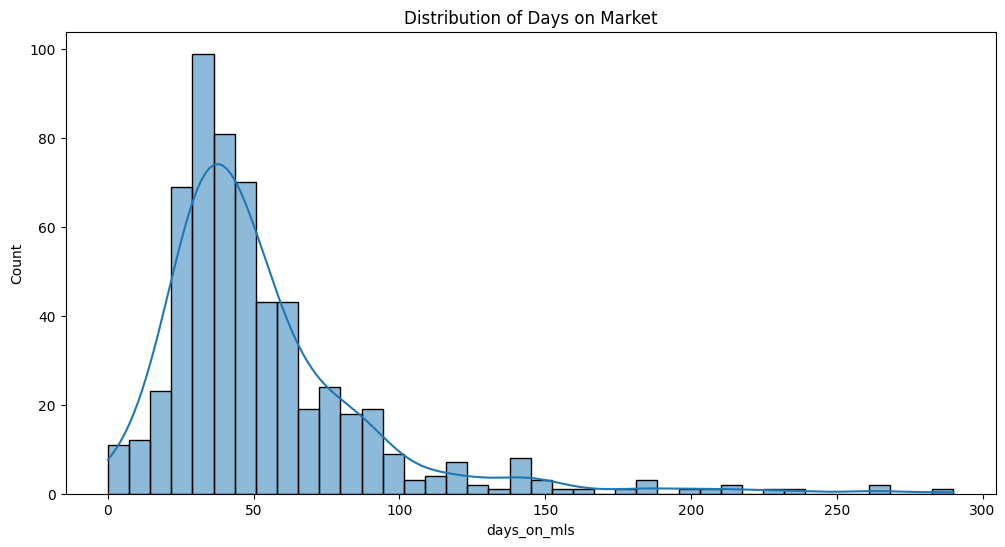

Days on Market Statistics:
count    583.000000
mean      53.207547
std       37.695969
min        0.000000
25%       31.000000
50%       43.000000
75%       62.000000
max      290.000000
Name: days_on_mls, dtype: float64


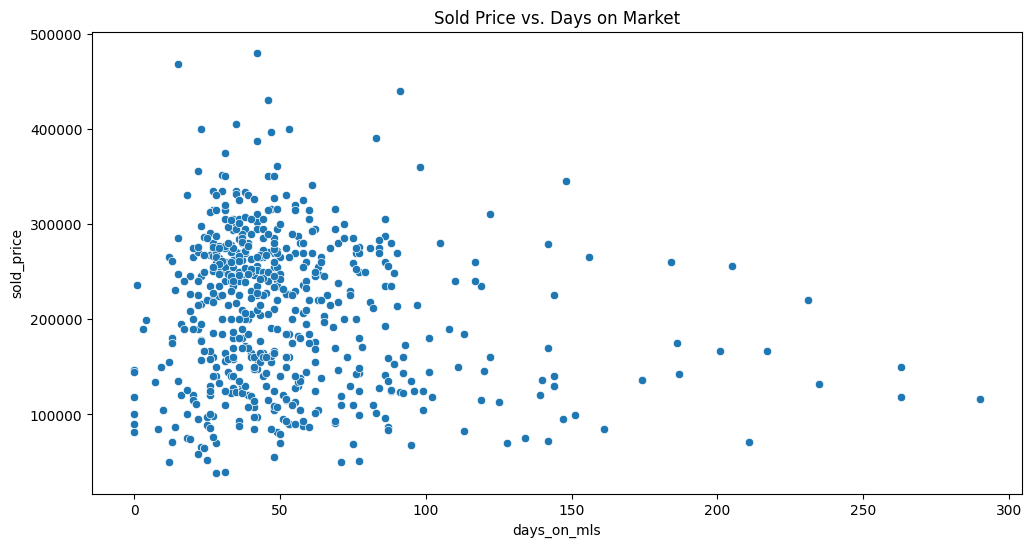

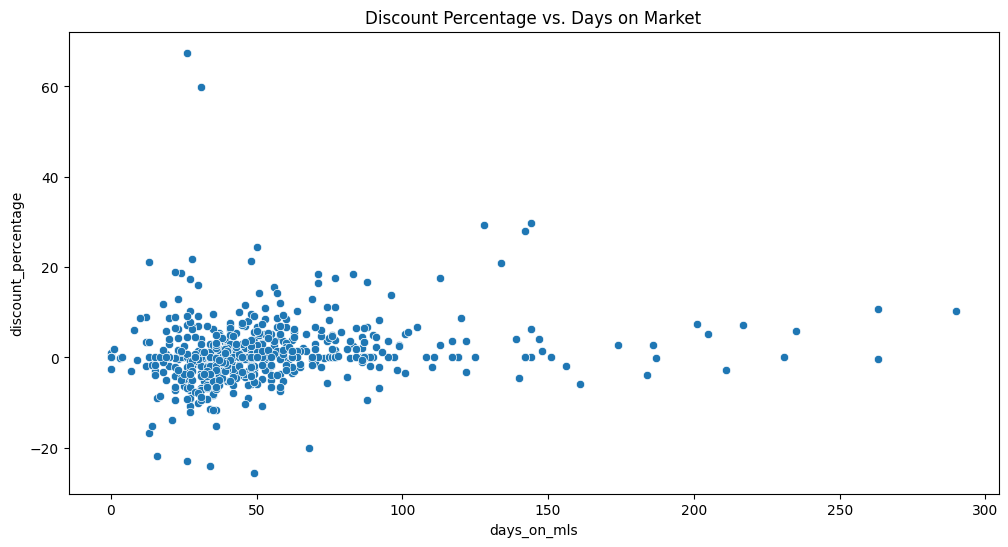

In [4]:
# Analyze days on market
plt.figure(figsize=(12, 6))
sns.histplot(sold_df["days_on_mls"].dropna(), kde=True)
plt.title("Distribution of Days on Market")
plt.show()

print("Days on Market Statistics:")
print(sold_df["days_on_mls"].describe())

# Relationship between days on market and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x="days_on_mls", y="sold_price", data=sold_df)
plt.title("Sold Price vs. Days on Market")
plt.show()

# Calculate average discount for properties on market longer
if "list_price" in sold_df.columns:
    sold_df["discount_percentage"] = (
        (sold_df["list_price"] - sold_df["sold_price"]) / sold_df["list_price"] * 100
    )

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="days_on_mls", y="discount_percentage", data=sold_df)
    plt.title("Discount Percentage vs. Days on Market")
    plt.show()

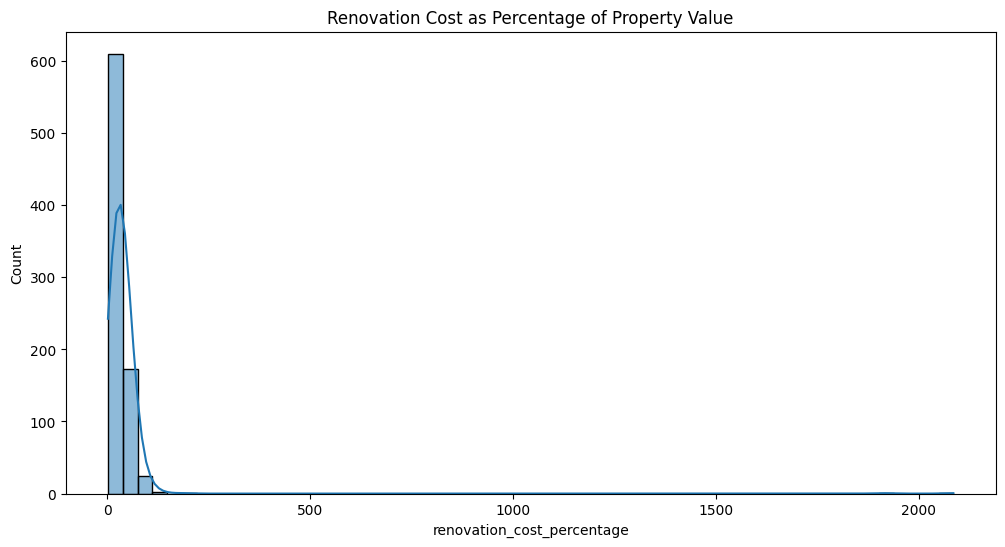

Renovation Cost Percentage Statistics:
count     812.000000
mean       38.020259
std        98.992740
min         2.014815
25%        23.211735
50%        29.259146
75%        38.457408
max      2085.416667
Name: renovation_cost_percentage, dtype: float64


In [7]:
# Estimate renovation costs based on property age and size
# This is a simplified model but based on industry standards

# Base renovation costs per square foot (these are industry averages)
base_renovation_costs = {
    "cosmetic": 10,  # $10/sqft for paint, fixtures, etc.
    "moderate": 25,  # $25/sqft for kitchen/bath updates
    "major": 50,  # $50/sqft for full renovation
}

# Estimate renovation level based on property age
sold_df["estimated_renovation_level"] = pd.cut(
    sold_df["year_built"],
    bins=[0, 1970, 1990, 2000, 2025],
    labels=["major", "moderate", "cosmetic", "minimal"],
)

# Calculate estimated renovation costs
renovation_cost_mapping = {
    "major": base_renovation_costs["major"],
    "moderate": base_renovation_costs["moderate"],
    "cosmetic": base_renovation_costs["cosmetic"],
    "minimal": base_renovation_costs["cosmetic"] * 0.5,  # Minimal costs
}

sold_df["estimated_renovation_cost"] = (
    pd.to_numeric(sold_df["estimated_renovation_level"].map(renovation_cost_mapping))
    * sold_df["sqft"]
)

# Analyze renovation costs as percentage of property value
sold_df["renovation_cost_percentage"] = (
    sold_df["estimated_renovation_cost"] / sold_df["sold_price"] * 100
)

plt.figure(figsize=(12, 6))
sns.histplot(sold_df["renovation_cost_percentage"], kde=True)
plt.title("Renovation Cost as Percentage of Property Value")
plt.show()

print("Renovation Cost Percentage Statistics:")
print(sold_df["renovation_cost_percentage"].describe())